In [9]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
df=pd.read_csv('Books_Data_Clean.csv')

In [12]:
df.head()

,index,Publishing Year,Book Name,Author,language_code,Author_Rating,Book_average_rating,Book_ratings_count,genre,gross sales,publisher revenue,sale price,sales rank,Publisher,units sold
0,0,1975.0,Beowulf,"Unknown, Seamus Heaney",en-US,Novice,3.42,155903,genre fiction,34160.0,20496.0,4.88,1,HarperCollins Publishers,7000
1,1,1987.0,Batman: Year One,"Frank Miller, David Mazzucchelli, Richmond Lew...",eng,Intermediate,4.23,145267,genre fiction,12437.5,7462.5,1.99,2,HarperCollins Publishers,6250
2,2,2015.0,Go Set a Watchman,Harper Lee,eng,Novice,3.31,138669,genre fiction,47795.0,28677.0,8.69,3,"Amazon Digital Services, Inc.",5500
3,3,2008.0,When You Are Engulfed in Flames,David Sedaris,en-US,Intermediate,4.04,150898,fiction,41250.0,24750.0,7.50,3,Hachette Book Group,5500
4,4,2011.0,Daughter of Smoke & Bone,Laini Taylor,eng,Intermediate,4.04,198283,genre fiction,37952.5,22771.5,7.99,4,Penguin Group (USA) LLC,4750


In [15]:
df.describe()

,index,Publishing Year,Book_average_rating,Book_ratings_count,gross sales,publisher revenue,sale price,sales rank,units sold
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000
mean,535.926660,1994.730426,4.012230,94817.793855,1832.644985,841.360638,4.844311,613.314172,9744.482656
std,308.769358,23.204719,0.246492,31473.890412,3947.885096,2279.579848,3.561712,369.628663,15350.021050
min,0.000000,1901.000000,2.970000,27308.000000,104.940000,0.000000,0.990000,1.000000,106.000000
25%,271.000000,1989.000000,3.860000,70701.000000,366.300000,0.000000,1.990000,291.000000,570.000000
50%,535.000000,2003.000000,4.030000,89204.000000,792.000000,273.240000,3.990000,596.000000,3942.000000
75%,802.000000,2010.000000,4.180000,113400.000000,1470.260000,714.756000,6.990000,933.000000,5427.000000
max,1069.000000,2016.000000,4.770000,206792.000000,47795.000000,28677.000000,33.860000,1273.000000,61560.000000


In [17]:
df=df[df['Publishing Year']>1900]

In [21]:
df.isna().sum()

index                   0
Publishing Year         0
Book Name               0
Author                  0
language_code          47
Author_Rating           0
Book_average_rating     0
Book_ratings_count      0
genre                   0
gross sales             0
publisher revenue       0
sale price              0
sales rank              0
Publisher               0
units sold              0
dtype: int64

In [23]:
df.dropna(subset='Book Name',inplace=True)

In [24]:
df.duplicated().sum()

np.int64(0)

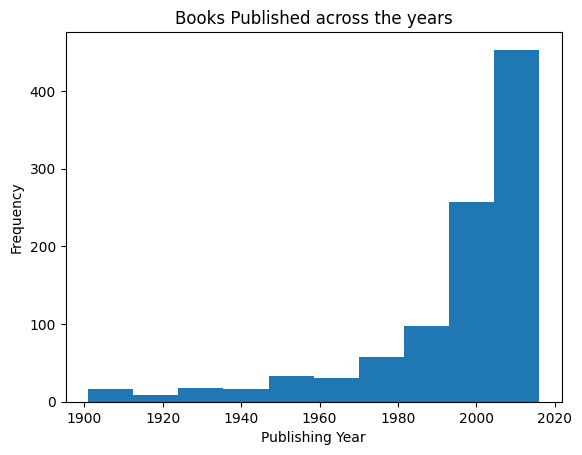

In [27]:
plt.hist(df['Publishing Year'])
plt.xlabel('Publishing Year')
plt.ylabel('Frequency')
plt.title("Books Published across the years")
plt.show()

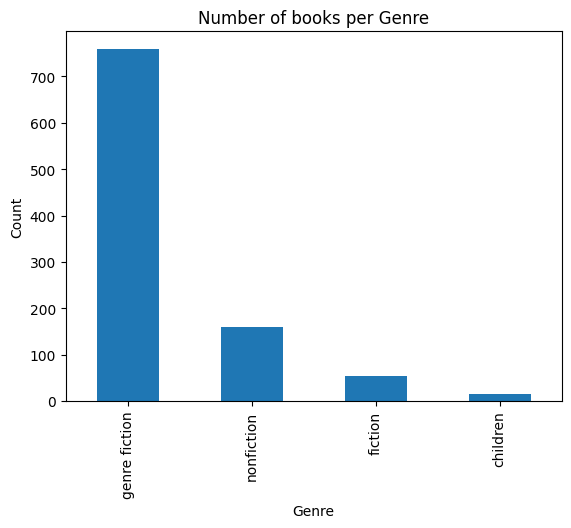

In [36]:
df['genre'].value_counts().plot(kind="bar")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.title("Number of books per Genre")
plt.show()

In [63]:
df.groupby('Author')['Book_average_rating'].mean().sort_values(ascending=False)

Author
Bill Watterson                  4.650000
Bill Watterson, G.B. Trudeau    4.610000
J.R.R. Tolkien                  4.590000
George R.R. Martin              4.560000
Sarah J. Maas                   4.526000
                                  ...   
Chetan Bhagat                   3.273333
Audrey Niffenegger              3.230000
Herman Koch, Sam Garrett        3.220000
P.D. James                      3.210000
Sue Monk Kidd                   3.100000
Name: Book_average_rating, Length: 669, dtype: float64

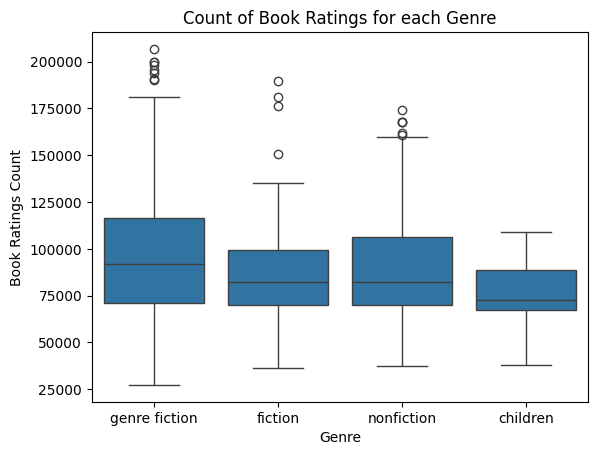

In [64]:
sns.boxplot(x='genre',y='Book_ratings_count',data=df)
plt.xlabel("Genre")
plt.ylabel("Book Ratings Count")
plt.title("Count of Book Ratings for each Genre")
plt.show()

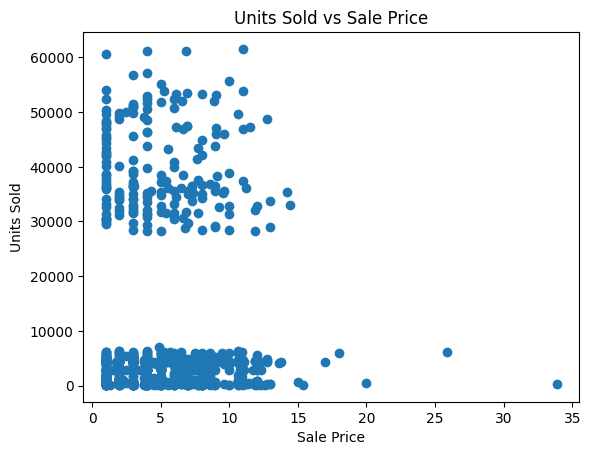

In [65]:
plt.scatter(df['sale price'],df['units sold'])
plt.xlabel("Sale Price")
plt.ylabel("Units Sold")
plt.title("Units Sold vs Sale Price")
plt.show()

In [68]:
language_counts = df['language_code'].value_counts()

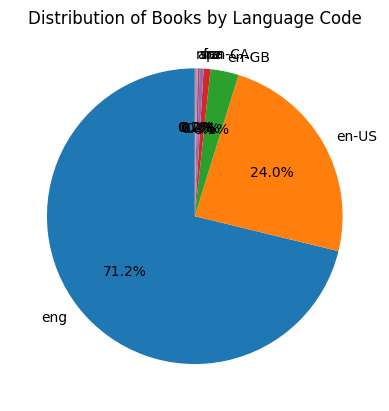

In [69]:
plt.pie(language_counts,labels=language_counts.index, startangle=90, autopct='%1.1f%%')
plt.title("Distribution of Books by Language Code")
plt.show()

In [71]:
df.groupby('Publisher ')['publisher revenue'].sum().sort_values(ascending=False)

Publisher 
Penguin Group (USA) LLC                 191581.104
Random House LLC                        174956.244
Amazon Digital Services,  Inc.          141767.772
HarperCollins Publishers                121769.814
Hachette Book Group                     107410.968
Simon and Schuster Digital Sales Inc     46858.206
Macmillan                                31249.830
HarperCollins Publishing                  2830.806
HarperCollins Christian Publishing        2135.670
Name: publisher revenue, dtype: float64

In [73]:
df.columns

Index(['index', 'Publishing Year', 'Book Name', 'Author', 'language_code',
       'Author_Rating', 'Book_average_rating', 'Book_ratings_count', 'genre',
       'gross sales', 'publisher revenue', 'sale price', 'sales rank',
       'Publisher ', 'units sold'],
      dtype='object')

In [75]:
df.groupby('language_code').size().sort_values(ascending=False)

language_code
eng      670
en-US    226
en-GB     29
en-CA      7
fre        4
ara        2
spa        2
nl         1
dtype: int64

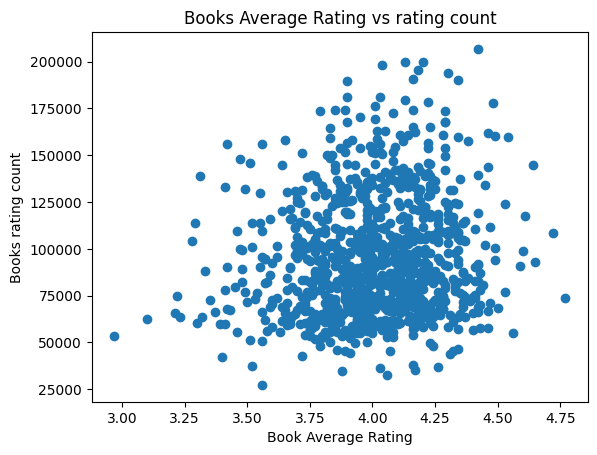

In [76]:
plt.scatter(df['Book_average_rating'],df['Book_ratings_count'])
plt.xlabel('Book Average Rating')
plt.ylabel('Books rating count')
plt.title('Books Average Rating vs rating count')
plt.show()

In [77]:
total_gross_sales_by_authors=df.groupby('Author')['gross sales'].sum()

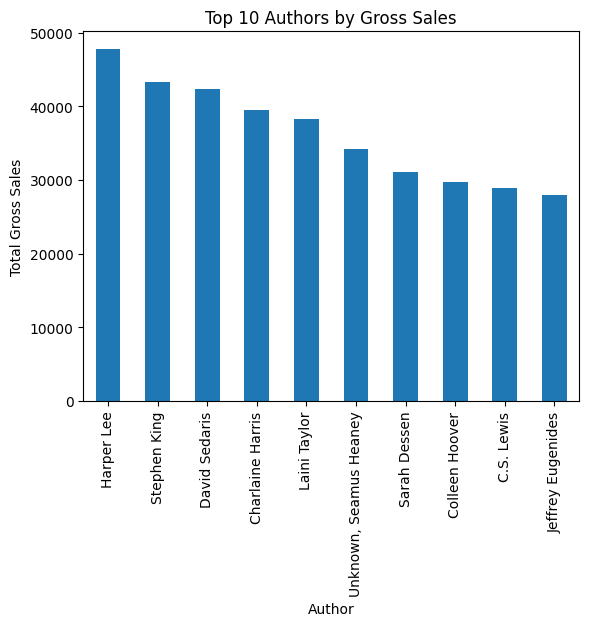

In [79]:
total_gross_sales_by_authors.sort_values(ascending=False).head(10).plot(kind='bar')
plt.xlabel('Author')
plt.ylabel ('Total Gross Sales')
plt.title('Top 10 Authors by Gross Sales')
plt.show()

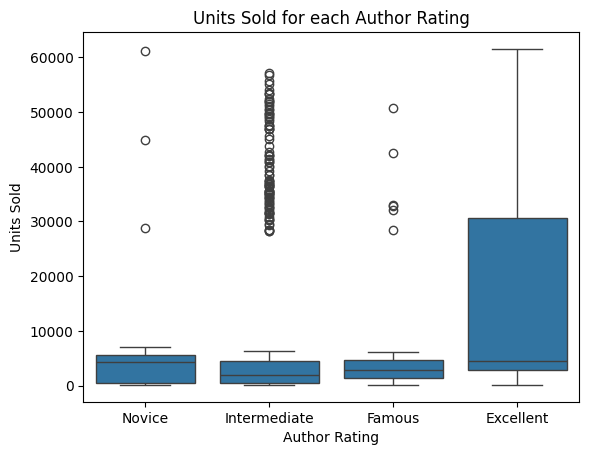

In [84]:
sns.boxplot(x='Author_Rating',y='units sold',data=df)
plt.xlabel('Author Rating')
plt.ylabel('Units Sold')
plt.title("Units Sold for each Author Rating")
plt.show()

In [86]:
df.groupby('Publishing Year')['units sold'].sum()


Publishing Year
1901.0      1415
1902.0      1535
1905.0     12630
1906.0      5718
1908.0      5706
           ...  
2012.0    765426
2013.0    421966
2014.0    182342
2015.0    231033
2016.0     87036
Name: units sold, Length: 101, dtype: int64

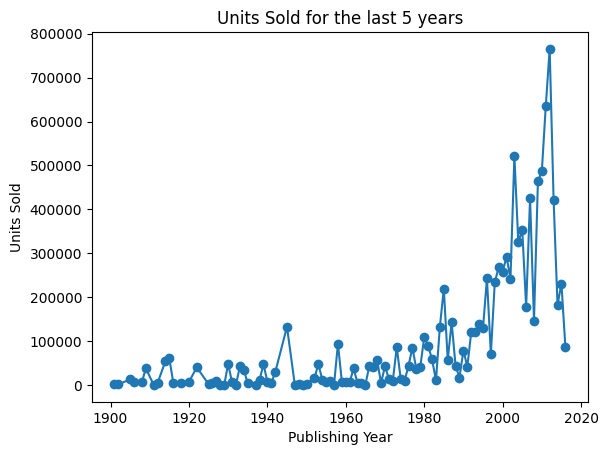

In [92]:
df.groupby('Publishing Year')['units sold'].sum().plot(kind='line',marker='o')
plt.xlabel('Publishing Year')
plt.ylabel('Units Sold')
plt.title('Units Sold for the last 5 years')
plt.show()